# Time series Analysis

Time series analysis was not reliable due to only 9 years of datapoints

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm  # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings  # This is a library that handles warnings.
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings(
    "ignore"
)  # Disable deprecation warnings that could indicate, for instance, a suspended library or
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use(
    "fivethirtyeight"
)  # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

### Import Non-Pivot Service Level 1 Dataset

In [146]:
path = r"/Users/patel/Documents/CF-Data Anaylst Course/portfolio_projects/mbs_analysis/datasets/"

df_mbs_national = pd.read_pickle(
    os.path.join(path, "clean_datasets/2014-22_mbs_census_national.pkl")
)
df_mbs_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            9 non-null      int64  
 1   No_of_patients                  9 non-null      Int32  
 2   No_of_services                  9 non-null      Int64  
 3   Total_mbs_paid_$                9 non-null      float64
 4   Total_provider_fees_$           9 non-null      float64
 5   Out_of_Pocket                   9 non-null      float64
 6   ERP                             9 non-null      Int64  
 7   %_People_had_service            9 non-null      Float64
 8   Out_of_pocket_cost_per_person   9 non-null      Float64
 9   No_of_service_per_person        9 non-null      Float64
 10  Out_of_pocket_cost_%            9 non-null      float64
 11  Out_of_pocket_cost_per_service  9 non-null      Float64
 12  Provider_fees_pp_per_service    9 non-nu

In [147]:
df_mbs_national

,Year,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,%_People_had_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_%,Out_of_pocket_cost_per_service,Provider_fees_pp_per_service,Provider_fees_per_person,MBS_Rebate_pp_per_service,MBS_Rebate_per_service
0,2014,43506186,193717426,1.184411e+10,1.377151e+10,1.927395e+09,115500735,37.667454,44.301634,4.452641,13.995527,9.949519,71.090702,316.54137,61.141183,272.239737
1,2015,44940261,202468022,1.264765e+10,1.468724e+10,2.039584e+09,117235485,38.333326,45.384339,4.50527,13.886780,10.073611,72.541014,326.816874,62.467403,281.432535
2,2016,46252524,211409654,1.326188e+10,1.548230e+10,2.220421e+09,118928355,38.891082,48.00648,4.57077,14.341671,10.50293,73.233661,334.73423,62.730731,286.727749
3,2017,47518654,218442418,1.388385e+10,1.622844e+10,2.344588e+09,120787030,39.340858,49.340373,4.596982,14.447405,10.733209,74.291604,341.517201,63.558395,292.176828
4,2018,49148423,228263440,1.463491e+10,1.715666e+10,2.521750e+09,122814700,40.018355,51.308874,4.64437,14.698373,11.047543,75.161676,349.078602,64.114133,297.769728
5,2019,50410722,234638188,1.523878e+10,1.791196e+10,2.673179e+09,124740878,40.412351,53.027985,4.654529,14.923991,11.39277,76.33863,355.3204,64.94586,302.292415
6,2020,50435139,239432226,1.563093e+10,1.825569e+10,2.624758e+09,126792380,39.777737,52.042254,4.74733,14.377756,10.962427,76.245746,361.963683,65.283319,309.921429
7,2021,51932185,255843158,1.711764e+10,2.005992e+10,2.942286e+09,128449915,40.42991,56.656305,4.926486,14.667481,11.500349,78.407118,386.271531,66.906768,329.615226
8,2022,52437154,269785115,1.726667e+10,2.055560e+10,3.288923e+09,128162865,40.914468,62.721239,5.144923,16.000136,12.1909,76.192478,392.004425,64.001578,329.283185


### Plot Trends Year vs No of Patients & Services

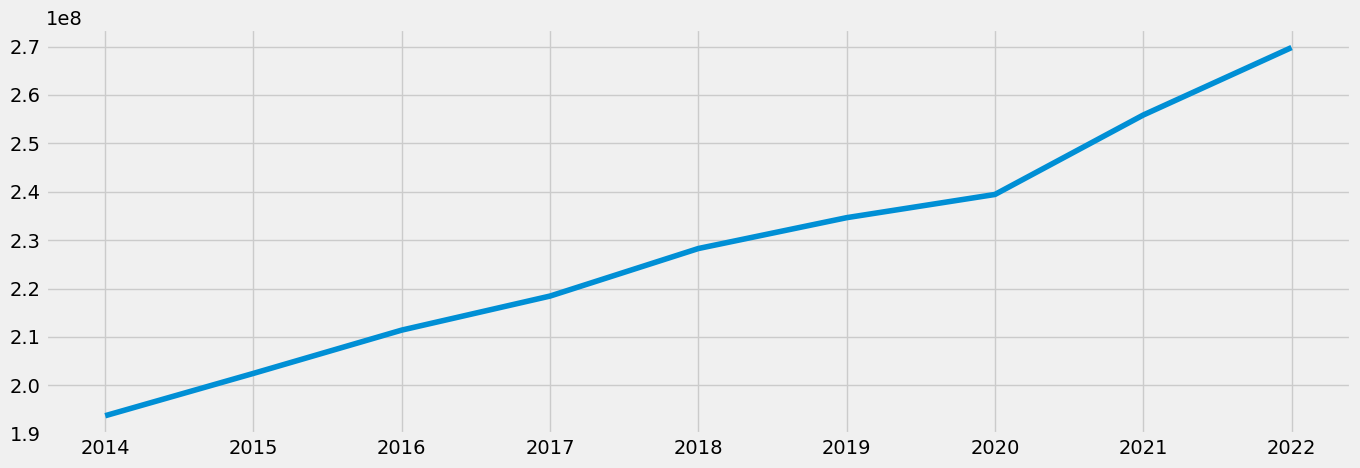

In [148]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_mbs_national["Year"], df_mbs_national["No_of_services"])

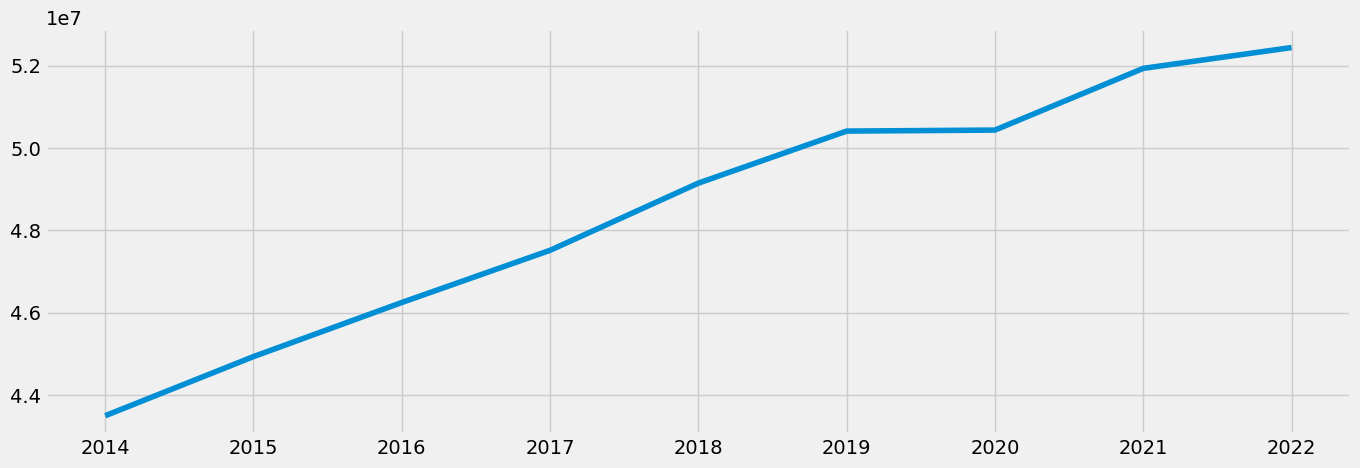

In [149]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_mbs_national["Year"], df_mbs_national["No_of_patients"])

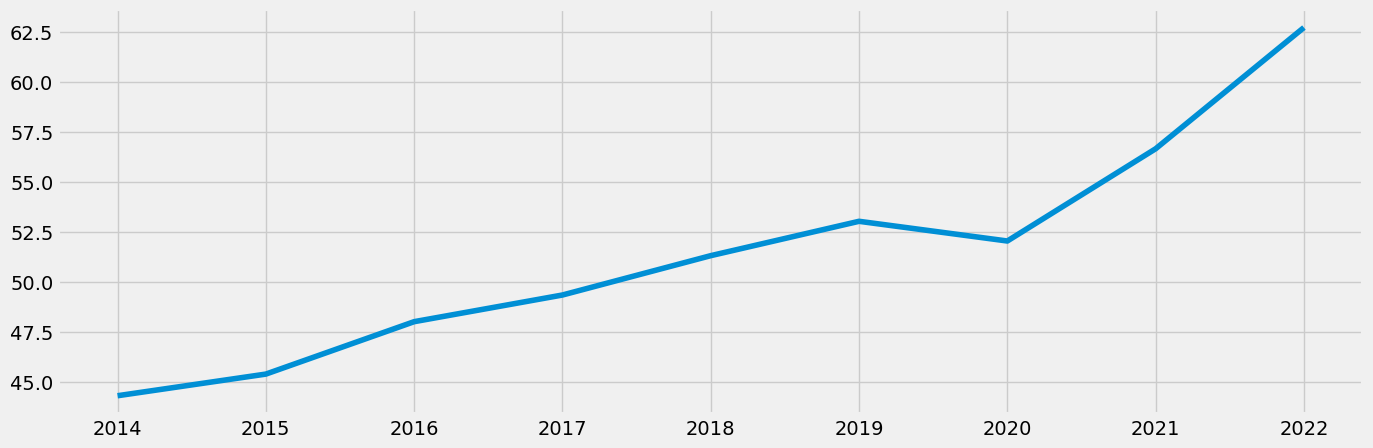

In [150]:
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(df_mbs_national["Year"], df_mbs_national["Out_of_pocket_cost_per_person"])

Visually, the data is non-staitionary since there is an updward trend. Mean is increasing

### Normalisation of Data using MinScaler Method

In [151]:
# convert year to datetime field -> into years
df_mbs_national["Year"] = pd.to_datetime(df_mbs_national["Year"], format="%Y")

# set the Year as the index
df_mbs_national.set_index("Year", inplace=True)

In [152]:
df_mbs_national.columns

Index(['No_of_patients', 'No_of_services', 'Total_mbs_paid_$',
       'Total_provider_fees_$', 'Out_of_Pocket', 'ERP', '%_People_had_service',
       'Out_of_pocket_cost_per_person', 'No_of_service_per_person',
       'Out_of_pocket_cost_%', 'Out_of_pocket_cost_per_service',
       'Provider_fees_pp_per_service', 'Provider_fees_per_person',
       'MBS_Rebate_pp_per_service', 'MBS_Rebate_per_service'],
      dtype='object')

In [153]:
# Columns to normalize
columns_to_normalize = [
    "No_of_patients",
    "No_of_services",
    "Total_mbs_paid_$",
    "Total_provider_fees_$",
    "Out_of_Pocket",
    "ERP",
    "%_People_had_service",
    "Out_of_pocket_cost_per_person",
    "No_of_service_per_person",
    "Out_of_pocket_cost_%",
    "Out_of_pocket_cost_per_service",
    "Provider_fees_pp_per_service",
    "Provider_fees_per_person",
    "MBS_Rebate_pp_per_service",
    "MBS_Rebate_per_service",
]
df_normalized = df_mbs_national[columns_to_normalize]

In [102]:
""" # Normalize the data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_normalized),
    columns=columns_to_normalize,
    index=df_mbs_national.index,
) """

' # Normalize the data\nscaler = MinMaxScaler()\ndf_normalized = pd.DataFrame(\n    scaler.fit_transform(df_normalized),\n    columns=columns_to_normalize,\n    index=df_mbs_national.index,\n) '

In [154]:
df_normalized

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,%_People_had_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_%,Out_of_pocket_cost_per_service,Provider_fees_pp_per_service,Provider_fees_per_person,MBS_Rebate_pp_per_service,MBS_Rebate_per_service
Year,,,,,,,,,,,,,,,
2014-01-01,43506186,193717426,1.184411e+10,1.377151e+10,1.927395e+09,115500735,37.667454,44.301634,4.452641,13.995527,9.949519,71.090702,316.54137,61.141183,272.239737
2015-01-01,44940261,202468022,1.264765e+10,1.468724e+10,2.039584e+09,117235485,38.333326,45.384339,4.50527,13.886780,10.073611,72.541014,326.816874,62.467403,281.432535
2016-01-01,46252524,211409654,1.326188e+10,1.548230e+10,2.220421e+09,118928355,38.891082,48.00648,4.57077,14.341671,10.50293,73.233661,334.73423,62.730731,286.727749
2017-01-01,47518654,218442418,1.388385e+10,1.622844e+10,2.344588e+09,120787030,39.340858,49.340373,4.596982,14.447405,10.733209,74.291604,341.517201,63.558395,292.176828
2018-01-01,49148423,228263440,1.463491e+10,1.715666e+10,2.521750e+09,122814700,40.018355,51.308874,4.64437,14.698373,11.047543,75.161676,349.078602,64.114133,297.769728
2019-01-01,50410722,234638188,1.523878e+10,1.791196e+10,2.673179e+09,124740878,40.412351,53.027985,4.654529,14.923991,11.39277,76.33863,355.3204,64.94586,302.292415
2020-01-01,50435139,239432226,1.563093e+10,1.825569e+10,2.624758e+09,126792380,39.777737,52.042254,4.74733,14.377756,10.962427,76.245746,361.963683,65.283319,309.921429
2021-01-01,51932185,255843158,1.711764e+10,2.005992e+10,2.942286e+09,128449915,40.42991,56.656305,4.926486,14.667481,11.500349,78.407118,386.271531,66.906768,329.615226
2022-01-01,52437154,269785115,1.726667e+10,2.055560e+10,3.288923e+09,128162865,40.914468,62.721239,5.144923,16.000136,12.1909,76.192478,392.004425,64.001578,329.283185


## Time Serices Analysis (No of Patients)

Conducting time series analysis on number of patients reported per year between 2014-2022. This is to identify unknown changes in patients. A known impact is Covid in 2020-21

In [104]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(
    df_normalized["No_of_patients"], model="additive"
)

In [105]:
from pylab import rcParams  # This will define a fixed size for all special charts.

rcParams["figure.figsize"] = 18, 7

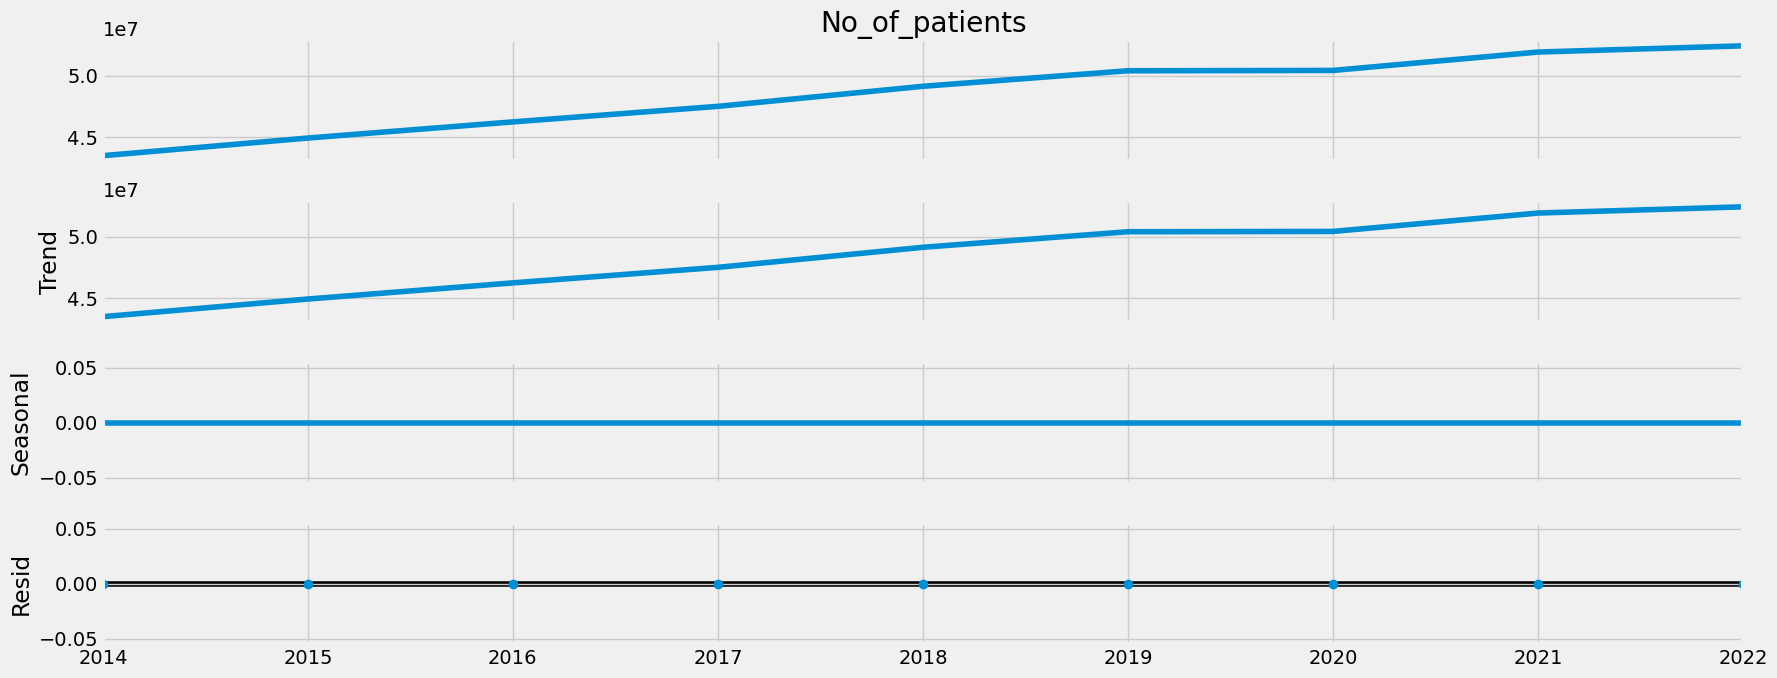

In [106]:
# Plot the separate components

decomposition.plot()
plt.show()

### Testing for Stationary (No of Patients)

In [107]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller  # Import the adfuller() function


def dickey_fuller(timeseries):  # Define the function
    # Perform the Dickey-Fuller test:
    print("Dickey-Fuller Stationarity test:")
    test = adfuller(timeseries, autolag="AIC")
    result = pd.Series(
        test[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Number of Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in test[4].items():
        result["Critical Value (%s)" % key] = value
    print(result)


# Apply the test using the function on the time series
dickey_fuller(df_normalized["No_of_patients"])

Dickey-Fuller Stationarity test:
Test Statistic                -1.668530
p-value                        0.447395
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Test statistic -1.669 is larger than the Critical Value (5%). Cannot reject the hypotheis that there is a unit root (non-statitonary)

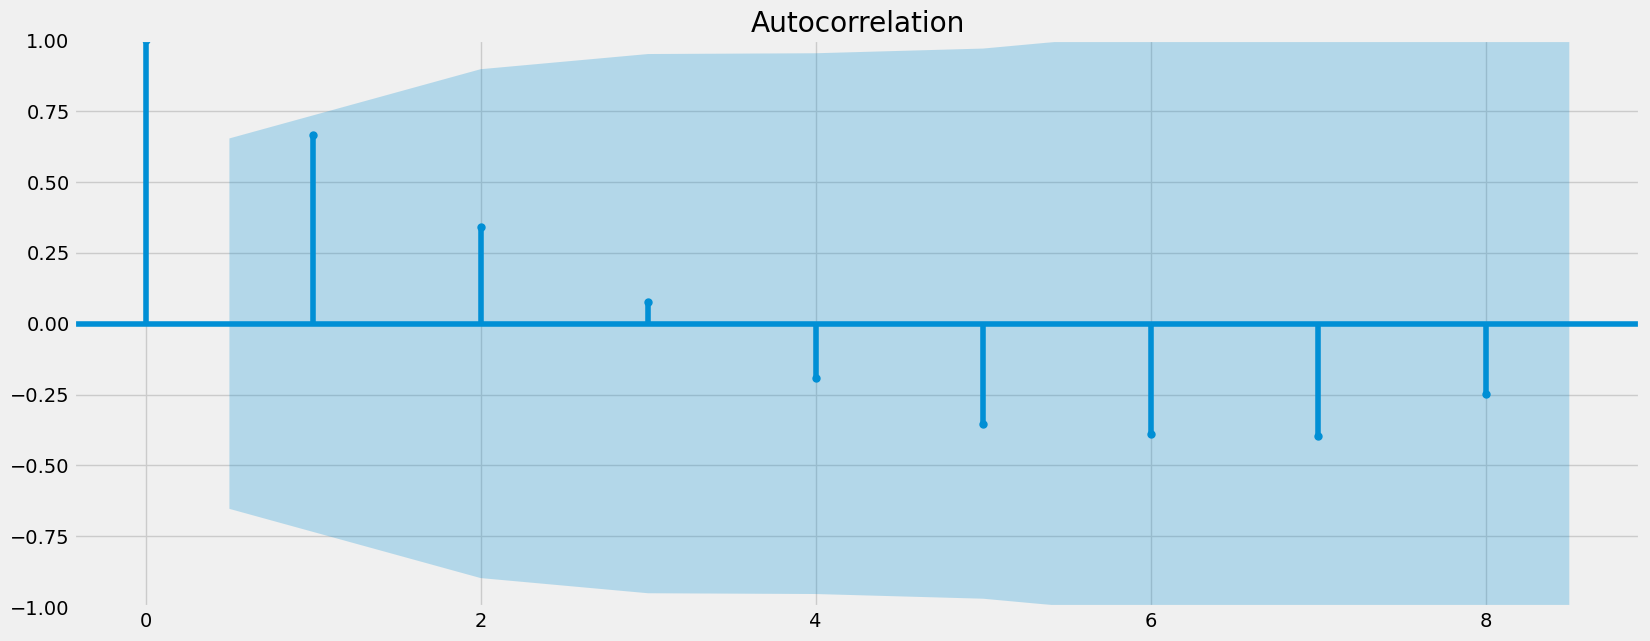

In [108]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf,
)  # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_normalized["No_of_patients"])
plt.show()

Only 1 lag is beyond the blue, indicating the data has minimal overall autocorrelation in the series

### Stationarizing using Differencing (No of patients)

In [109]:
data_diff = df_normalized["No_of_patients"] - df_normalized["No_of_patients"].shift(
    1
)  # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [110]:
data_diff.dropna(
    inplace=True
)  # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff.head()

Year
2015-01-01    1434075
2016-01-01    1312263
2017-01-01    1266130
2018-01-01    1629769
2019-01-01    1262299
Name: No_of_patients, dtype: Int32

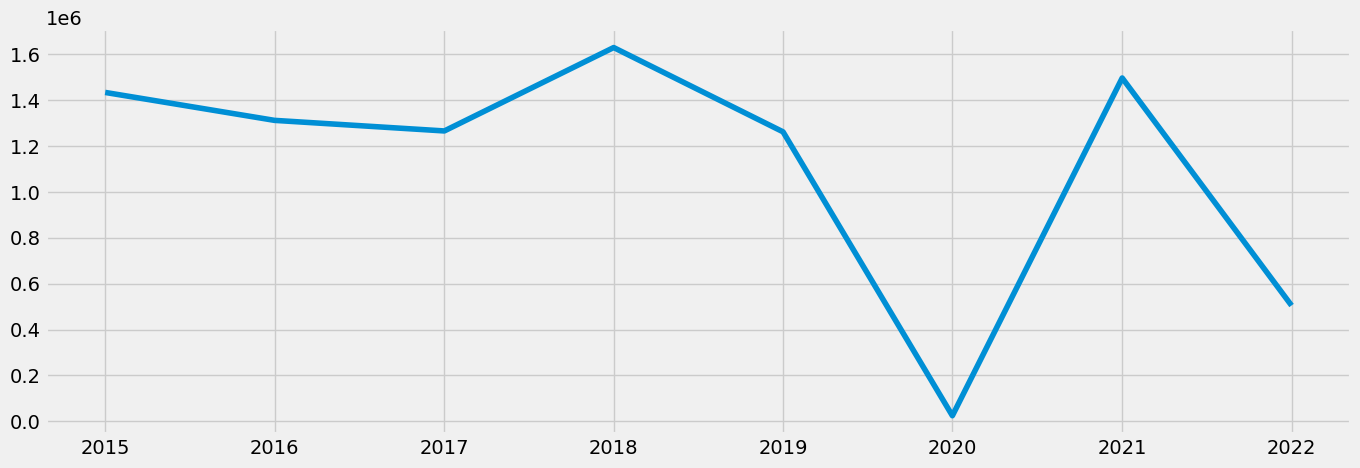

In [111]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff)

In [112]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 8.139068
p-value                        1.000000
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [113]:
data_diff_2 = data_diff - data_diff.shift(1)

data_diff_2.dropna(
    inplace=True
)  # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff_2.head()

Year
2016-01-01     -121812
2017-01-01      -46133
2018-01-01      363639
2019-01-01     -367470
2020-01-01    -1237882
Name: No_of_patients, dtype: Int32

Iteration 1 Differencing: Test statistics (8.1) is higher than all critical values, indicating the data is not staitionary.

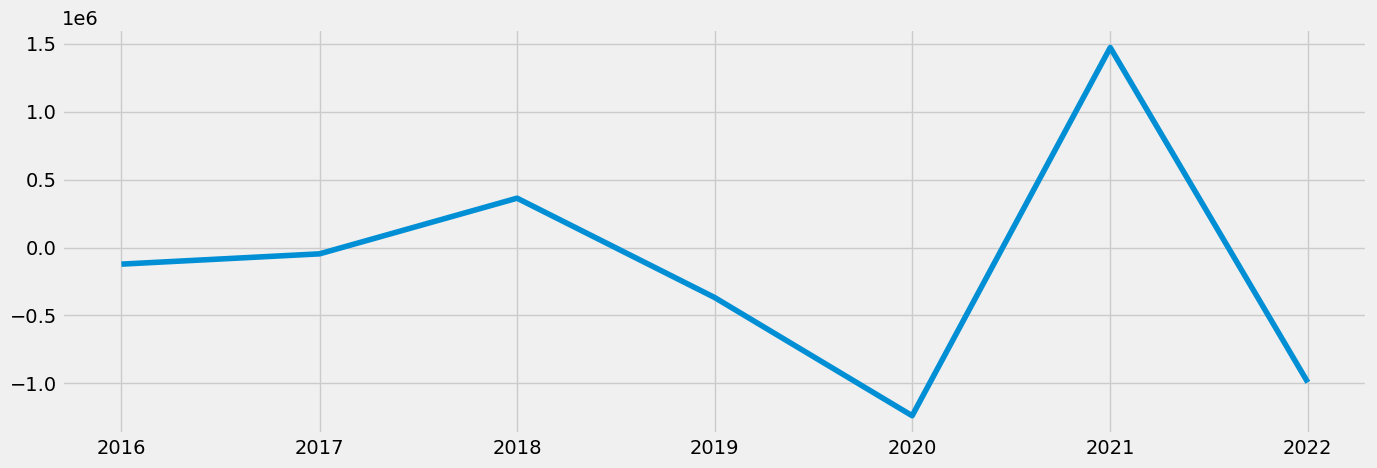

In [114]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff_2)

In [115]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -2.786719
p-value                        0.060196
Number of Lags Used            1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


 Iteration 2 Differencing: Test statistics (-2.1) is higher than all critical values, indicating the data is not staitionary.

In [116]:
data_diff_3 = data_diff_2 - data_diff_2.shift(1)

data_diff_3.dropna(
    inplace=True
)  # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff_3.head()

Year
2017-01-01      75679
2018-01-01     409772
2019-01-01    -731109
2020-01-01    -870412
2021-01-01    2710511
Name: No_of_patients, dtype: Int32

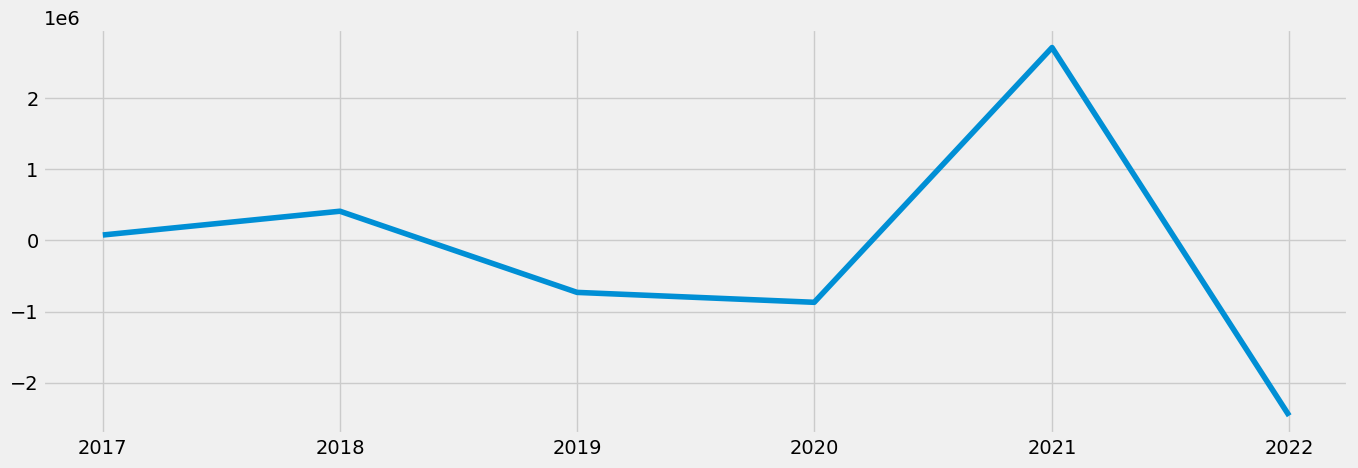

In [117]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_diff_3)

In [118]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                -5.229796
p-value                        0.000008
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Iteration 3 Differencing: Test statistics (-5.2) is lower than all critical values 5% and 10%, indicating the data is now staitionary. PValue is less than 0.05, increasing confidence

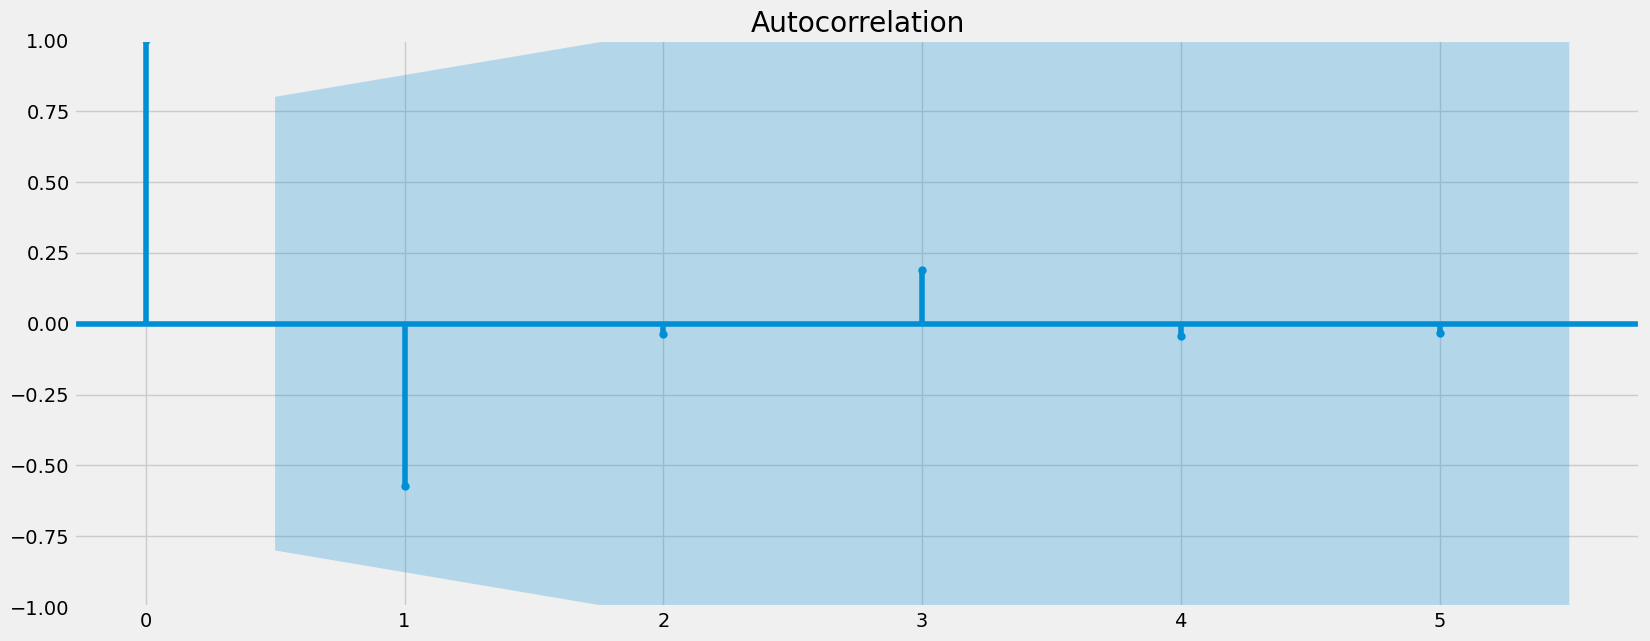

In [131]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf,
)  # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff_3)
plt.show()

Data has week autocorrelation, hence is staitonary.

### Logarithm + Differencing Method To Stationarize Data

In [123]:
log_data = np.log(df_normalized)
log_data

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,%_People_had_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_%,Out_of_pocket_cost_per_service,Provider_fees_pp_per_service,Provider_fees_per_person,MBS_Rebate_pp_per_service,MBS_Rebate_per_service
Year,,,,,,,,,,,,,,,
2014-01-01,17.588414,19.081911,23.195097,23.345868,21.379435,18.564787,3.628796,3.791022,1.493497,2.638738,2.297524,4.263957,5.757454,4.113186,5.606683
2015-01-01,17.620845,19.126093,23.260737,23.410245,21.436012,18.579695,3.64632,3.815167,1.505248,2.630937,2.309919,4.284152,5.7894,4.134645,5.639893
2016-01-01,17.649627,19.169308,23.308160,23.462963,21.520963,18.594032,3.660765,3.871336,1.519682,2.663169,2.351654,4.293655,5.813337,4.138851,5.658533
2017-01-01,17.676633,19.202033,23.353992,23.510031,21.575376,18.609539,3.672264,3.898743,1.5254,2.670515,2.373343,4.307998,5.833398,4.151959,5.677359
2018-01-01,17.710355,19.246011,23.406676,23.565652,21.648219,18.626187,3.689338,3.937864,1.535656,2.687737,2.402208,4.319641,5.855297,4.160665,5.69632
2019-01-01,17.735714,19.273555,23.447109,23.608734,21.706534,18.641749,3.699135,3.97082,1.537841,2.702970,2.432979,4.335179,5.87302,4.173554,5.711395
2020-01-01,17.736199,19.293781,23.472518,23.627743,21.688255,18.658062,3.683307,3.952056,1.557582,2.665682,2.394474,4.333962,5.891544,4.178737,5.736319
2021-01-01,17.765449,19.360075,23.563375,23.721990,21.802453,18.67105,3.69957,4.037003,1.594626,2.685633,2.442377,4.361915,5.956541,4.2033,5.797926
2022-01-01,17.775126,19.413136,23.572044,23.746399,21.913826,18.668812,3.711484,4.1387,1.63801,2.772597,2.50069,4.333263,5.971273,4.158908,5.796918


In [124]:
log_data.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

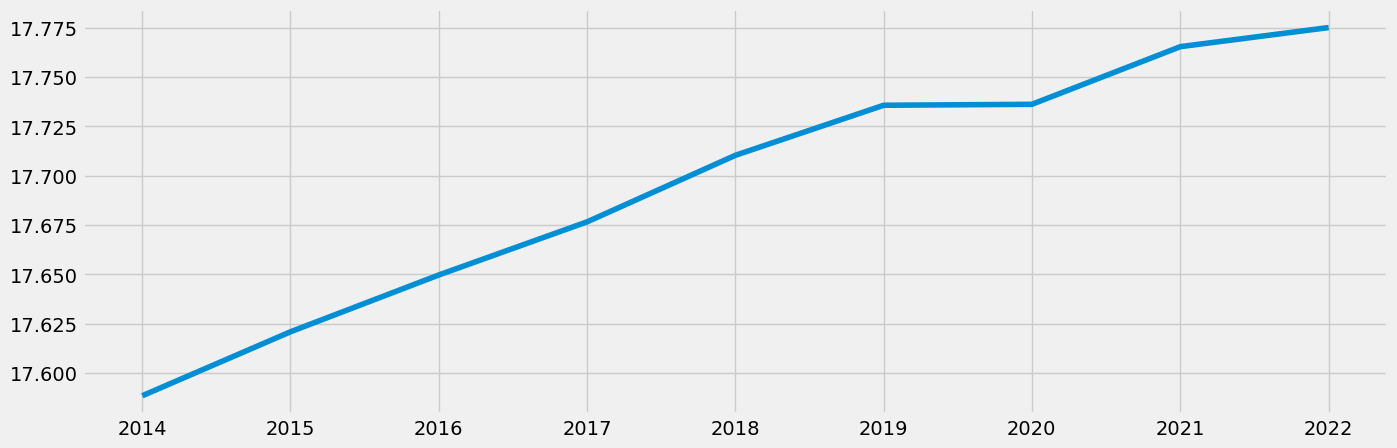

In [135]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data.index, log_data["No_of_patients"])

In [136]:
dickey_fuller(log_data["No_of_patients"])

Dickey-Fuller Stationarity test:
Test Statistic                -2.092423
p-value                        0.247572
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Logarithm Iteration: Test Statistic (-2.092) is larger than Critical Values, making the data non-staitonary

#### Differencing the log data to make it staitionary

In [137]:
log_data_diff = log_data.diff().dropna()

# Check stationarity again
dickey_fuller(log_data_diff["No_of_patients"])

Dickey-Fuller Stationarity test:
Test Statistic                 3.603311
p-value                        1.000000
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


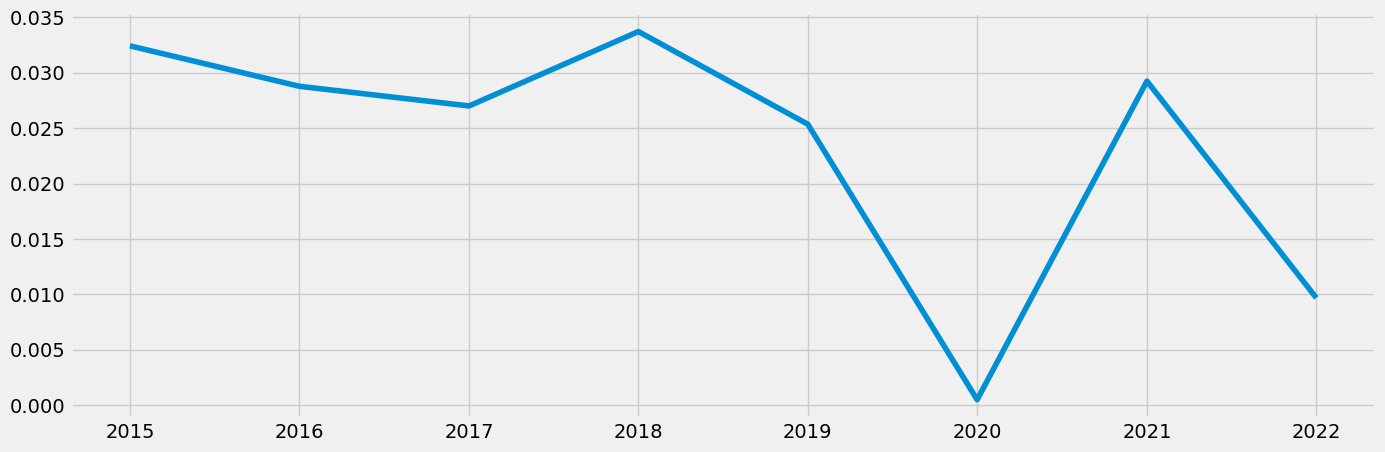

In [138]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff.index, log_data_diff["No_of_patients"])

Iternation 1 Differencing Logarithm Data : Test Statistic is larger than critical values, the data is not staitonary

In [132]:
log_data_diff_2 = log_data_diff.diff().dropna()

# Check stationarity again
dickey_fuller(log_data_diff_2["No_of_patients"])

Dickey-Fuller Stationarity test:
Test Statistic                -2.996747
p-value                        0.035199
Number of Lags Used            1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


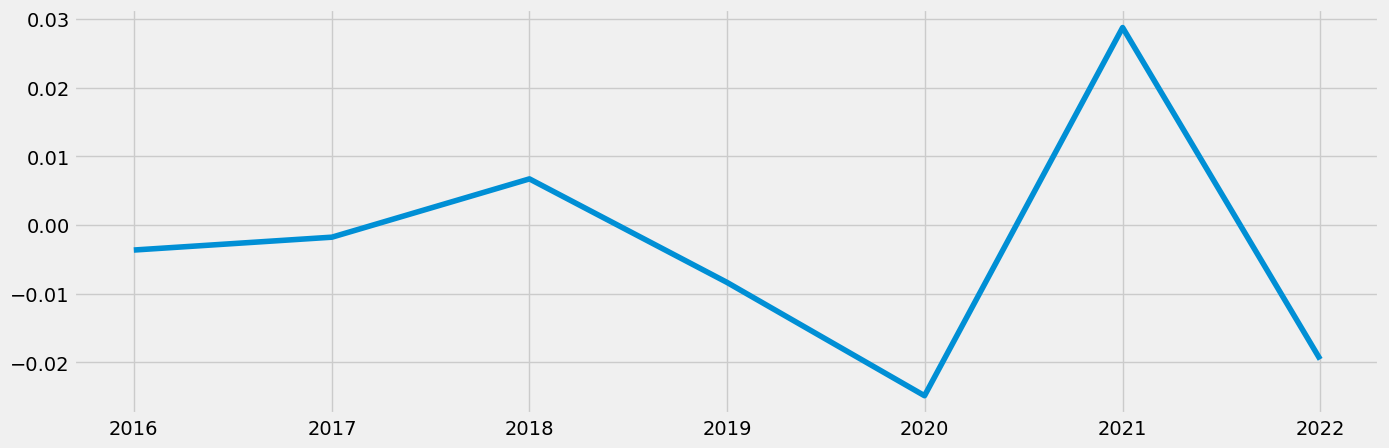

In [139]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff_2.index, log_data_diff_2["No_of_patients"])

Iternation 2 Differencing Logarithm Data : Test Statistic is larger than critical values, the data is not staitonary

In [140]:
log_data_diff_3 = log_data_diff_2.diff().dropna()

# Check stationarity again
dickey_fuller(log_data_diff_3["No_of_patients"])

Dickey-Fuller Stationarity test:
Test Statistic                -5.464494
p-value                        0.000002
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


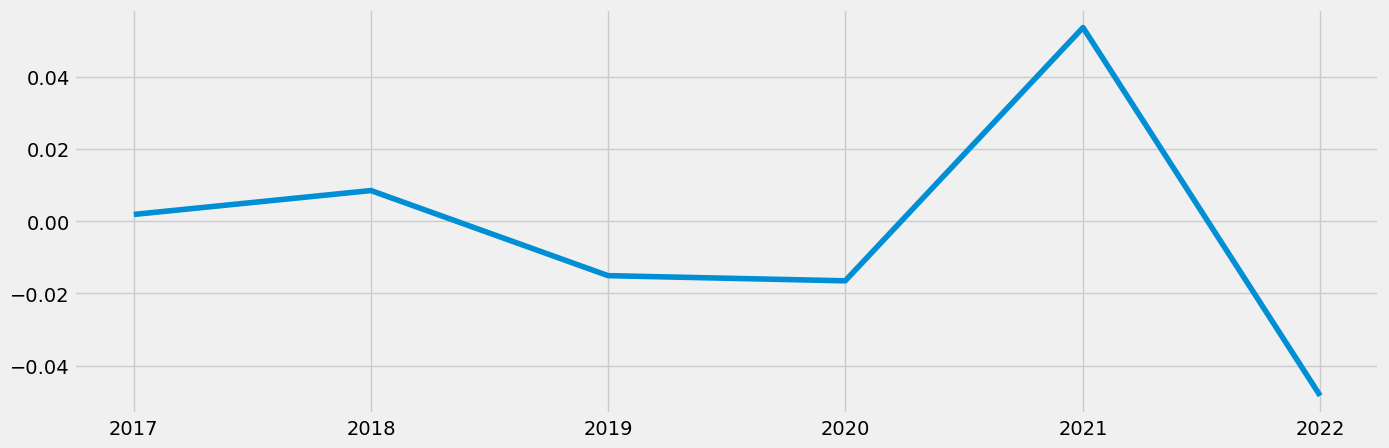

In [141]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff_3.index, log_data_diff_3["No_of_patients"])

Iteration 3 Logarithm Differencing: Test Statistics is lower than critical value 5%, indictaing the data is staitonary

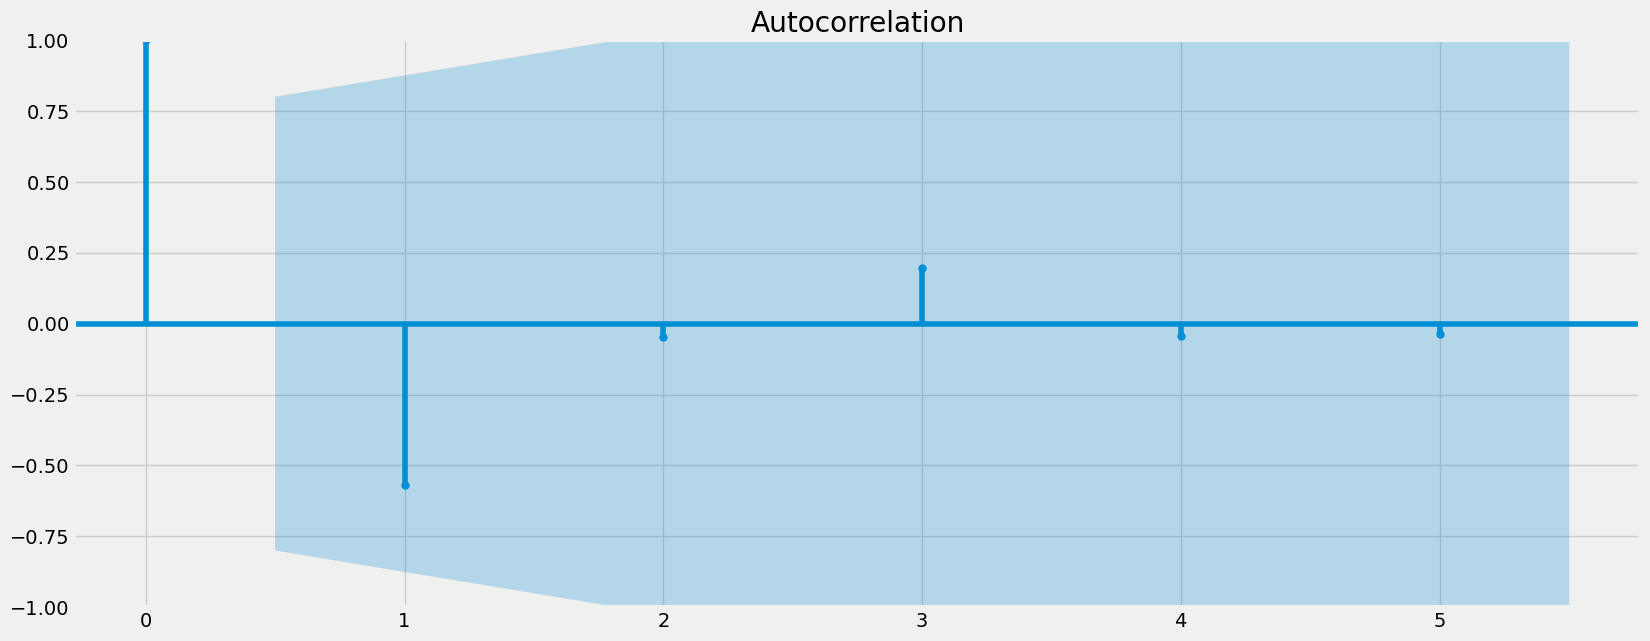

In [143]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf,
)  # Here, you import the autocorrelation and partial correlation plots

plot_acf(log_data_diff_3["No_of_patients"])
plt.show()

## Time Series Analysis (Out of Pocket Cost)

In [155]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(
    df_normalized["Out_of_pocket_cost_per_person"], model="additive"
)

In [156]:
from pylab import rcParams  # This will define a fixed size for all special charts.

rcParams["figure.figsize"] = 18, 7

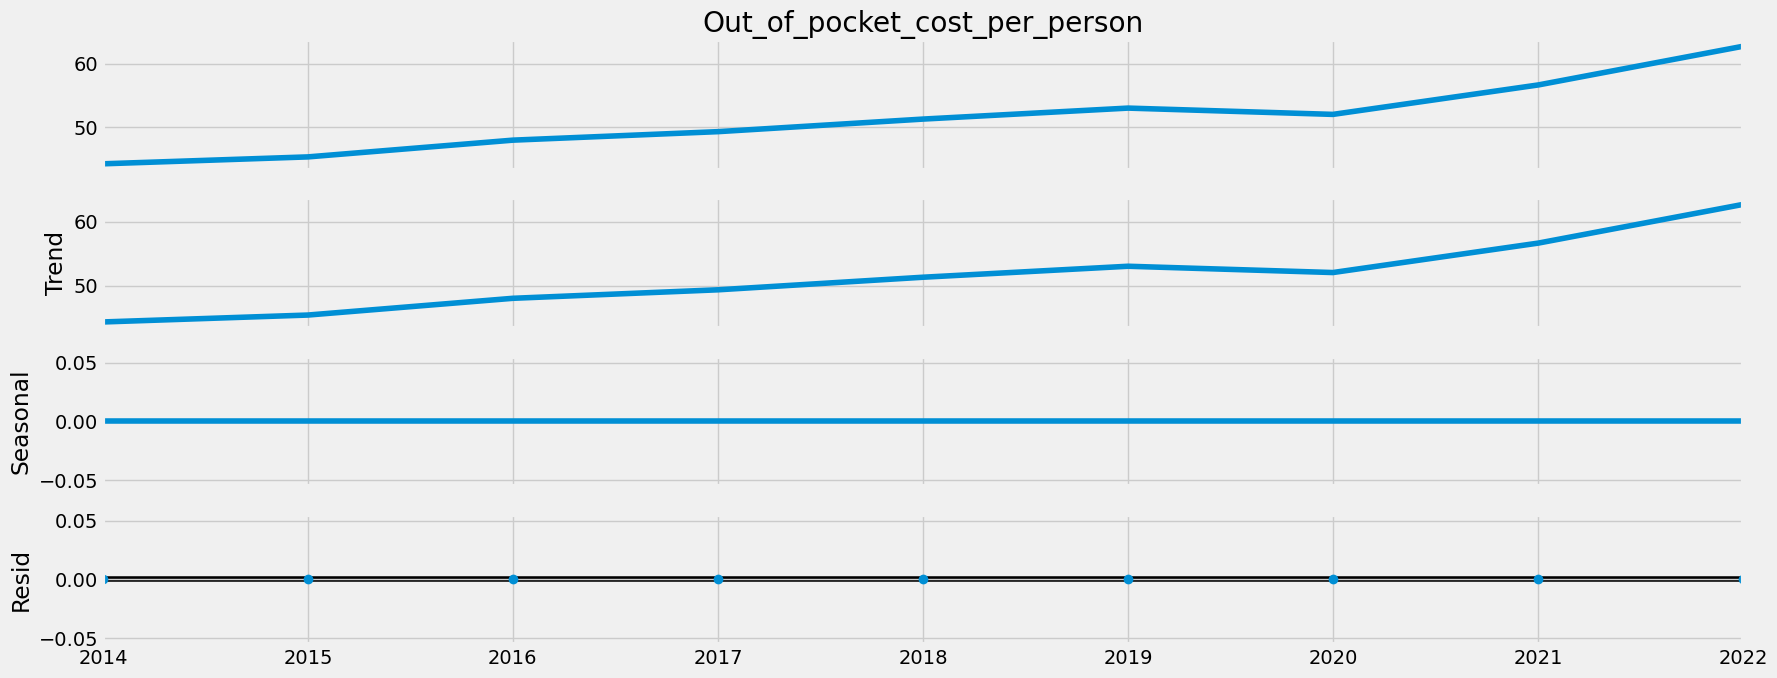

In [157]:
# Plot the separate components

decomposition.plot()
plt.show()

### Testing for Stationary (No of Patients)

In [158]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller  # Import the adfuller() function


def dickey_fuller(timeseries):  # Define the function
    # Perform the Dickey-Fuller test:
    print("Dickey-Fuller Stationarity test:")
    test = adfuller(timeseries, autolag="AIC")
    result = pd.Series(
        test[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Number of Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in test[4].items():
        result["Critical Value (%s)" % key] = value
    print(result)


# Apply the test using the function on the time series
dickey_fuller(df_normalized["Out_of_pocket_cost_per_person"])

Dickey-Fuller Stationarity test:
Test Statistic                -0.016175
p-value                        0.957174
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Test statistic -0.016175 is larger than the Critical Value (5%). Cannot reject the hypotheis that there is a unit root (non-statitonary)

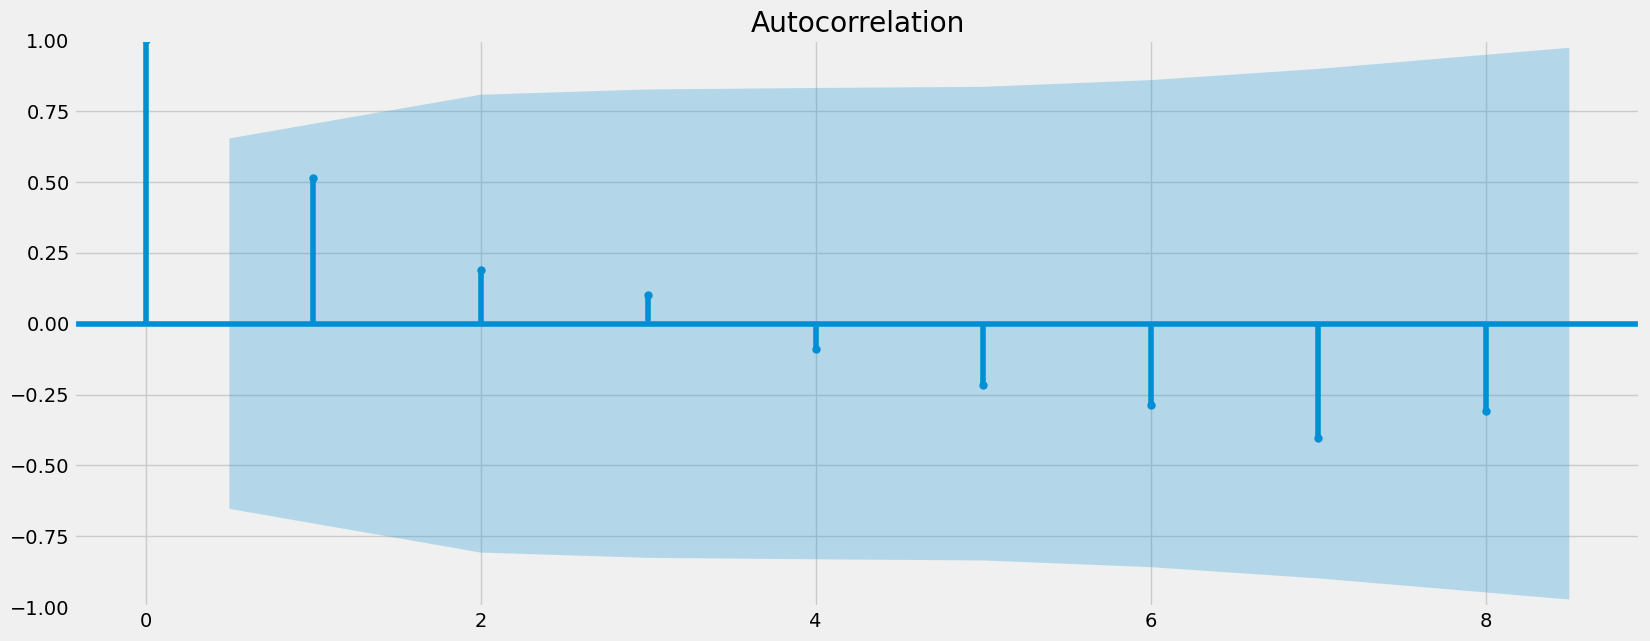

In [159]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import (
    plot_acf,
    plot_pacf,
)  # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_normalized["Out_of_pocket_cost_per_person"])
plt.show()

There is only 1 lag that is out of the confidence interval area, indicating overal the data has weak autocorrelation.

### Logarithm + Differencing Method

In [160]:
log_data = np.log(df_normalized)
log_data

,No_of_patients,No_of_services,Total_mbs_paid_$,Total_provider_fees_$,Out_of_Pocket,ERP,%_People_had_service,Out_of_pocket_cost_per_person,No_of_service_per_person,Out_of_pocket_cost_%,Out_of_pocket_cost_per_service,Provider_fees_pp_per_service,Provider_fees_per_person,MBS_Rebate_pp_per_service,MBS_Rebate_per_service
Year,,,,,,,,,,,,,,,
2014-01-01,17.588414,19.081911,23.195097,23.345868,21.379435,18.564787,3.628796,3.791022,1.493497,2.638738,2.297524,4.263957,5.757454,4.113186,5.606683
2015-01-01,17.620845,19.126093,23.260737,23.410245,21.436012,18.579695,3.64632,3.815167,1.505248,2.630937,2.309919,4.284152,5.7894,4.134645,5.639893
2016-01-01,17.649627,19.169308,23.308160,23.462963,21.520963,18.594032,3.660765,3.871336,1.519682,2.663169,2.351654,4.293655,5.813337,4.138851,5.658533
2017-01-01,17.676633,19.202033,23.353992,23.510031,21.575376,18.609539,3.672264,3.898743,1.5254,2.670515,2.373343,4.307998,5.833398,4.151959,5.677359
2018-01-01,17.710355,19.246011,23.406676,23.565652,21.648219,18.626187,3.689338,3.937864,1.535656,2.687737,2.402208,4.319641,5.855297,4.160665,5.69632
2019-01-01,17.735714,19.273555,23.447109,23.608734,21.706534,18.641749,3.699135,3.97082,1.537841,2.702970,2.432979,4.335179,5.87302,4.173554,5.711395
2020-01-01,17.736199,19.293781,23.472518,23.627743,21.688255,18.658062,3.683307,3.952056,1.557582,2.665682,2.394474,4.333962,5.891544,4.178737,5.736319
2021-01-01,17.765449,19.360075,23.563375,23.721990,21.802453,18.67105,3.69957,4.037003,1.594626,2.685633,2.442377,4.361915,5.956541,4.2033,5.797926
2022-01-01,17.775126,19.413136,23.572044,23.746399,21.913826,18.668812,3.711484,4.1387,1.63801,2.772597,2.50069,4.333263,5.971273,4.158908,5.796918


In [161]:
log_data.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
               '2022-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

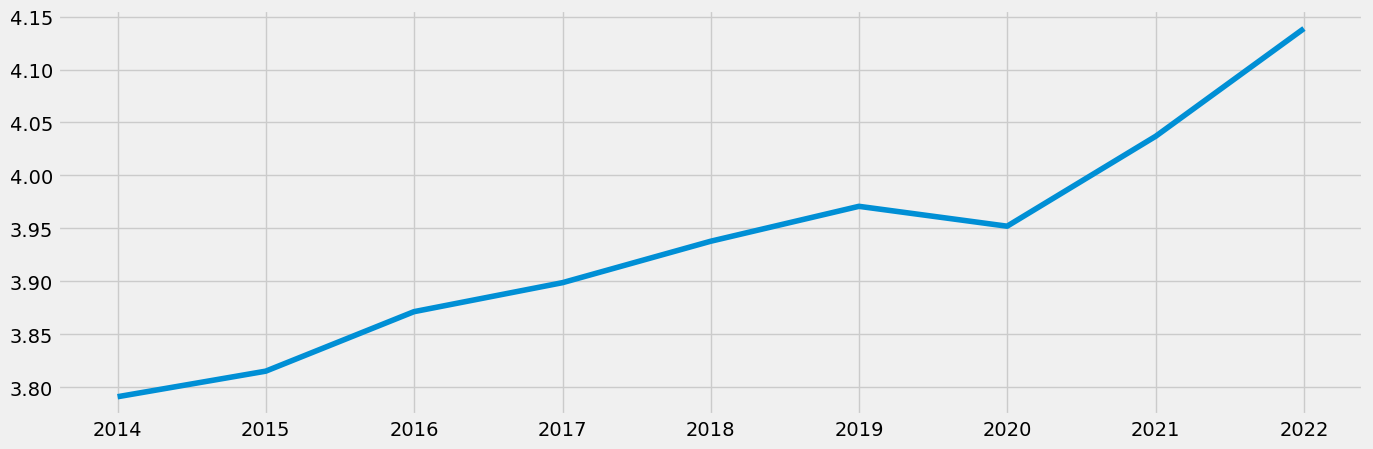

In [162]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data.index, log_data["Out_of_pocket_cost_per_person"])

In [163]:
dickey_fuller(log_data["Out_of_pocket_cost_per_person"])

Dickey-Fuller Stationarity test:
Test Statistic                -0.276083
p-value                        0.928824
Number of Lags Used            2.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Test Statistic of log data indicates the data is not staitonary.

####  Differencing the log data

In [164]:
log_data_diff = log_data.diff().dropna()

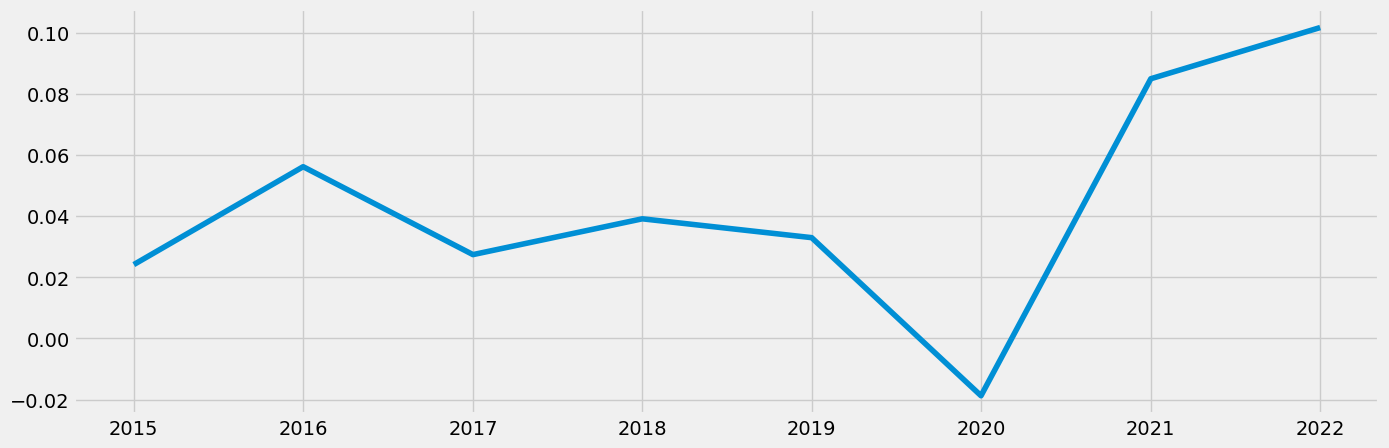

In [167]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff.index, log_data_diff["Out_of_pocket_cost_per_person"])

In [165]:
dickey_fuller(log_data_diff["Out_of_pocket_cost_per_person"])

Dickey-Fuller Stationarity test:
Test Statistic                -2.590214
p-value                        0.095037
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Iteration 1: Test Statistics is more than the critical value, indicatinig the data is not staitonary

####  Differencing Iteration 2

In [ ]:
log_data_diff_2 = log_data_diff.diff().dropna()

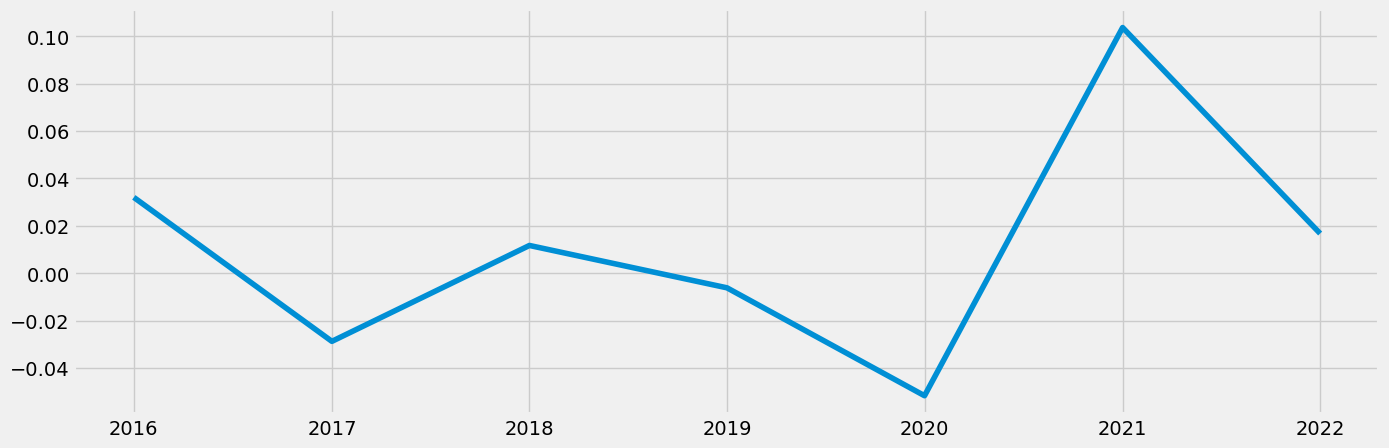

In [168]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff_2.index, log_data_diff_2["Out_of_pocket_cost_per_person"])

In [169]:
dickey_fuller(log_data_diff_2["Out_of_pocket_cost_per_person"])

Dickey-Fuller Stationarity test:
Test Statistic                -1.653786
p-value                        0.455067
Number of Lags Used            1.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


Iteration 2: Test Statistics is more than the critical value, indicatinig the data is not staitonary

####  Differencing Iteration 3

In [ ]:
log_data_diff_3 = log_data_diff_2.diff().dropna()

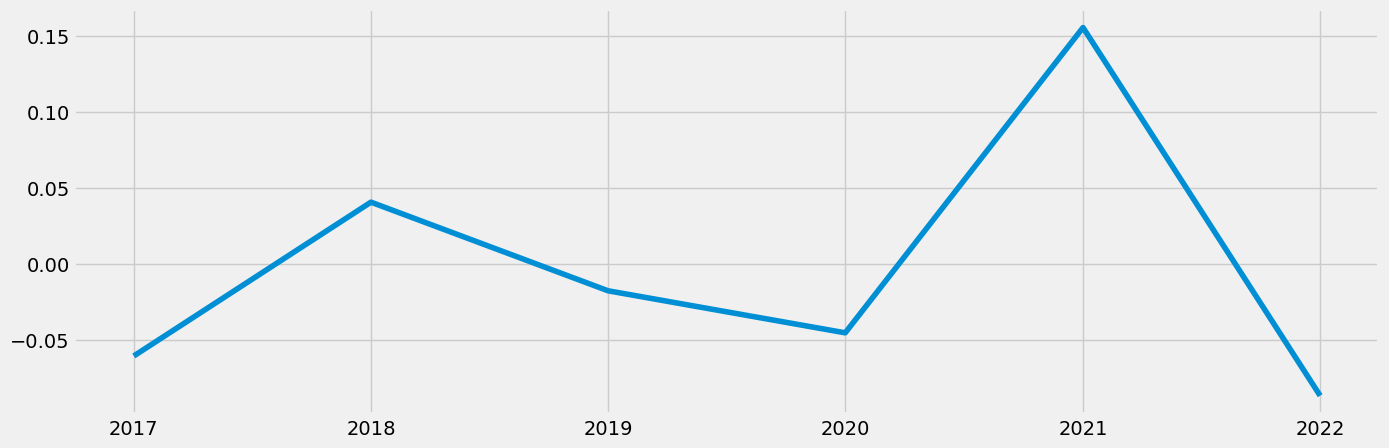

In [170]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15, 5), dpi=100)
plt.plot(log_data_diff_3.index, log_data_diff_3["Out_of_pocket_cost_per_person"])

In [171]:
dickey_fuller(log_data_diff_3["Out_of_pocket_cost_per_person"])

Dickey-Fuller Stationarity test:
Test Statistic                -1.724617
p-value                        0.418476
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Iteration 3: Test Statistics is more than the critical value, indicatinig the data is not staitonary. Unable to staitionarize the data with low number of observations